
Colin Smith

# Identifying [handwritten digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)

The [Digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) dataset in [`sklearn`](https://scikit-learn.org/) has 1,797 samples with 64 numerical features ($8{\times}8$ pixels) and a 10-class target variable representing the digits 0 through 9.

## Overview

The following code gives you an idea of what the [Digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) dataset looks like:

X.shape = (1797, 64)

digits.images[4] =
[[ 0.  0.  0.  1. 11.  0.  0.  0.]
 [ 0.  0.  0.  7.  8.  0.  0.  0.]
 [ 0.  0.  1. 13.  6.  2.  2.  0.]
 [ 0.  0.  7. 15.  0.  9.  8.  0.]
 [ 0.  5. 16. 10.  0. 16.  6.  0.]
 [ 0.  4. 15. 16. 13. 16.  1.  0.]
 [ 0.  0.  0.  3. 15. 10.  0.  0.]
 [ 0.  0.  0.  2. 16.  4.  0.  0.]]

y[59] = 3


<Figure size 432x288 with 0 Axes>

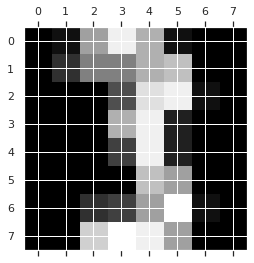

In [ ]:
from sklearn.datasets import load_digits
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

# Load the Digits dataset
digits = load_digits()

X = digits.data
y = digits.target

# Check shape of X
print( 'X.shape =', X.shape )

# Each image is 8px by 8px that's why 64 pixels
print( '\ndigits.images[4] =' )
print( digits.images[4] )

# Let's check a particular target value
print( '\ny[59] =', y[59] )

# Next, let's see how the image looks like
plt.gray()
plt.matshow(digits.images[59])
plt.show()

### Notebook setup

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import time

# Load the Digits dataset
digits = datasets.load_digits()

# To apply an estimator (classifier) on this data, we flatten the image,
# to transform the data into a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X ,             # (samples,features) matrix
    y ,             # target values
    test_size=0.25 , # 50-50 split
    random_state=int(time.time())
    )

## Part 1: Classification using a support vector machine

Generate a classification system for this problem using a *Support Vector Machine (SVM)*.


### Solution

Use GridSearchCV to find the best parameters for percision and recall and then run the SVM model on the best parameters displaying the metrics

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn import svm
import time
results = []

# Set the parameters by cross-validation
tuned_parameters = [
    {"kernel": ["rbf"],
        "gamma": [1e-3, 1e-4],
        "C": [1, 10, 100, 1000]
        },
    {"kernel": ["linear"],
        "C": [1, 10, 100, 1000]
        },
]

scores = [ "precision" , "recall" ]

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV( SVC() ,
                        tuned_parameters ,
                        scoring="%s_macro" % score
                      )
    clf.fit( X_train , y_train )

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.4f (+/-%0.04f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits = 4))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.9892 (+/-0.0105) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.9695 (+/-0.0137) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.9901 (+/-0.0071) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.9866 (+/-0.0157) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.9901 (+/-0.0071) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.9880 (+/-0.0069) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.9901 (+/-0.0071) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.9880 (+/-0.0069) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.9773 (+/-0.0107) for {'C': 1, 'kernel': 'linear'}
0.9773 (+/-0.0107) for {'C': 10, 'kernel': 'linear'}
0.9773 (+/-0.0107) for {'C': 100, 'kernel': 'linear'}
0.9773 (+/-0.0107) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
T

Lets see what it predicted vs what it was supposed to be

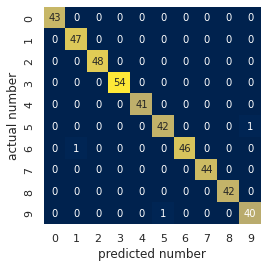

In [ ]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_true, y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='cividis')
plt.xlabel('predicted number')
plt.ylabel('actual number');

This model did very good reaching over 99% only missing 3 predicitons

## Part 2: Classification using multinomial logistic regression

Generate a classification system for this problem using *multinomial Logistic Regression*.


### Solution

In [ ]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
tuned_parameters = [
    {   "solver":['saga'],
        "penalty": ["l1", "l2"],
        "max_iter": [1, 10, 100, 100],
        "C": [1, 10, 100, 1000]
        },
    {   "solver":['newton-cg'],
        "penalty": ["l2", 'none'],
        "max_iter": [1, 10, 100, 100],
        "C": [1, 10, 100, 1000]
        },
    {   "solver":['sag'],
        "penalty": ["l2", 'none'],
        "max_iter": [1, 10, 100, 100],
        "C": [1, 10, 100, 1000]
        }
]

scores = [ "precision" , "recall" ]
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    clf = GridSearchCV( LogisticRegression(multi_class='multinomial') ,
                        tuned_parameters ,
                        scoring="%s_macro" % score
                      )
    clf.fit( X_train , y_train )

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.4f (+/-%0.04f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits = 4))
    print()


# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1, 'max_iter': 100, 'penalty': 'none', 'solver': 'sag'}

Grid scores on development set:

0.9335 (+/-0.0201) for {'C': 1, 'max_iter': 1, 'penalty': 'l1', 'solver': 'saga'}
0.9420 (+/-0.0085) for {'C': 1, 'max_iter': 1, 'penalty': 'l2', 'solver': 'saga'}
0.9623 (+/-0.0177) for {'C': 1, 'max_iter': 10, 'penalty': 'l1', 'solver': 'saga'}
0.9658 (+/-0.0160) for {'C': 1, 'max_iter': 10, 'penalty': 'l2', 'solver': 'saga'}
0.9713 (+/-0.0126) for {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
0.9714 (+/-0.0125) for {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
0.9706 (+/-0.0131) for {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
0.9706 (+/-0.0110) for {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
0.9374 (+/-0.0166) for {'C': 10, 'max_iter': 1, 'penalty': 'l1', 'solver': 'saga'}
0.9313 (+/-0.0299) for {'C': 10, 'max_iter': 1, 'penalty': 'l2', 's

Gridsearch picked between a bunch a different parameters to find its best model based on percision and recall. Recall had the better model and we will check that out.

Lets see what it predicted vs what it was supposed to be



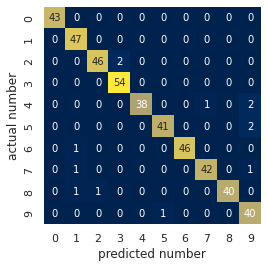

In [ ]:
mat = confusion_matrix(y_true, y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='cividis')
plt.xlabel('predicted number')
plt.ylabel('actual number');

This model also did very good reaching 97% accuracy.

## Part 3: Model comparison

Compare the two models. Which one did better and by how much?

### Solution

When comparing the two models scores the SVM model did a little better. Consistantly getting scores of above 99% where as the mulinomial logistic regession model struggles to get above 98%. Overall for this dataset both models work well but SVM was much more consitent.